In [1]:
# Loading datasets
import pandas as pd
import numpy as np

def load_dataset(file_name, **kwargs):
    try:
        data = pd.read_csv(file_name, **kwargs)
    except FileNotFoundError:
        raise FileNotFoundError(f"Cannot find {file_name}, please either place the file in the same directory as this notebook, or provide the full path")
    labels = data.values[:, -1]
    data = data.values[:, :-1]
    return data, labels




In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from IPython.display import clear_output

simple_data, simple_labels = load_dataset(r"C:\Users\Abdullah\OneDrive\Documents\UoM\Data engineering\60711-Cwk3-S-Third\Week 4 (Unsupervised)\simple.csv")
simple_data

array([[-1.28950198,  1.81071507],
       [-1.39228885,  1.93968336],
       [-1.58815054,  1.94525151],
       ...,
       [ 1.08917556,  3.49685747],
       [ 0.89001606,  3.71364034],
       [ 0.88769983,  4.53841559]])

Average score:0.8708956161526583


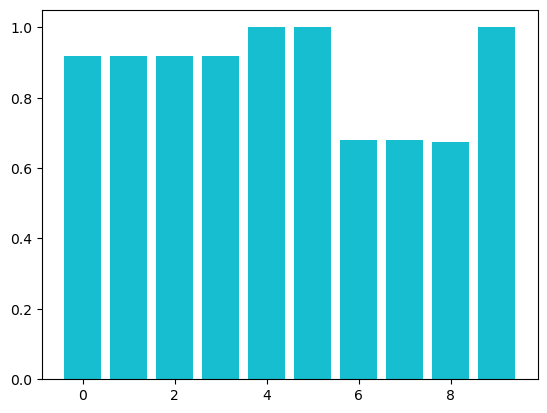

In [3]:
# Defining a function that runs the k means algorithm on a dataset and outputs a graph of the performance across 10 
# independent runs.
def k_means(data,labels):
    scores= []
    xaxes= []
    error=[]
    for i in range(0,10):
        global kmeans
        kmeans = KMeans(
             init="random",
             n_clusters=5,
             n_init=1)
        
        global y_kmeans # Setting y_kmeans as a global variable so we can use it later
        
        y_kmeans= kmeans.fit_predict(data)
        
        # Calculating the ARI scores
        score = adjusted_rand_score(labels,y_kmeans)
        scores.append(score)

        xaxes.append(i)
        
    # Clear output
    for i in range(10):
        clear_output(wait=True)
        plt.bar(xaxes,scores)
        
    # Printing the average score
    print(f"Average score:{sum(scores)/len(scores)}")
k_means(simple_data,simple_labels)

Here we can see a different score for the performance for each run of the k-means algorithm. The k-means algorithm results in a random ARI score as K-means is randomized as the algorithm involves a random selection for the initial centroid approximates.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


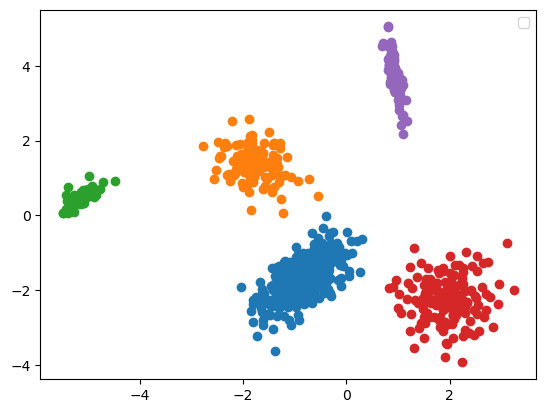

In [4]:
#Getting unique labels
u_labels = np.unique(y_kmeans)
def cluster_plot(data,method):
    
    #plotting the results:
    for i in u_labels:
        plt.scatter(data[method==i,0] , data[method==i,1])
    plt.legend()
    plt.show()
    
cluster_plot(simple_data,y_kmeans)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


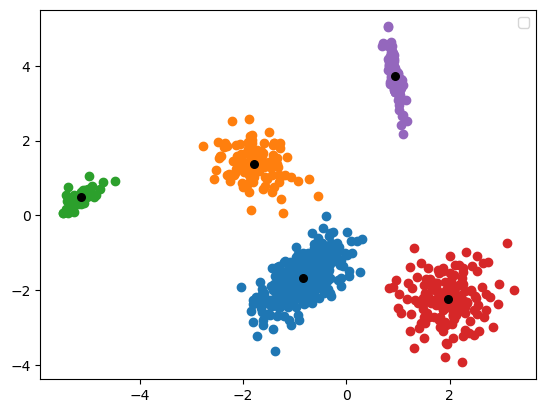

In [5]:
def centroids(data,method):
    #Getting the Centroids
    centroids = kmeans.cluster_centers_

    for i in u_labels:
        plt.scatter(data[method==i,0] , data[method==i,1])
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 30, color = 'k')
    plt.legend()
    plt.show()
    
centroids(simple_data,y_kmeans)

Average score:0.7070569794383633


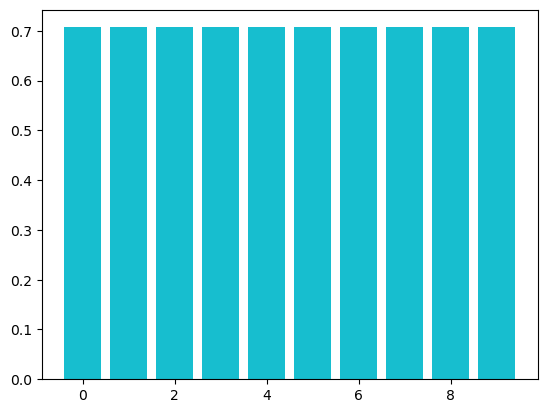

In [6]:
# Defining a function for the single linkage algorithm
def agglomerative_cluster(data,labels):
    scores= []
    xaxes= []
    for i in range(0,10):
        agg_clustering = AgglomerativeClustering(n_clusters=5, linkage="single")
        global y_agg_clustering
        y_agg_clustering= agg_clustering.fit_predict(data)

        score = adjusted_rand_score(labels,y_agg_clustering)
        scores.append(score)

        xaxes.append(i)
        
    # I needed to include this clear output command as it was giving me a UserWarning 10 times
    # mentioning a memory leak for Windows
    for i in range(10):
        clear_output(wait=True)
        plt.bar(xaxes,scores)
    # Printing the average score
    print(f"Average score:{sum(scores)/len(scores)}")
    

agglomerative_cluster(simple_data,simple_labels)

We have the performance scores as all equal to the same value over 10 independent runs as the agglomerative clustering algorithm merges 2 clusters consecutively until only 1 cluster remains. This is different to k-means where the algorithm repeats until the centroids don't change.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


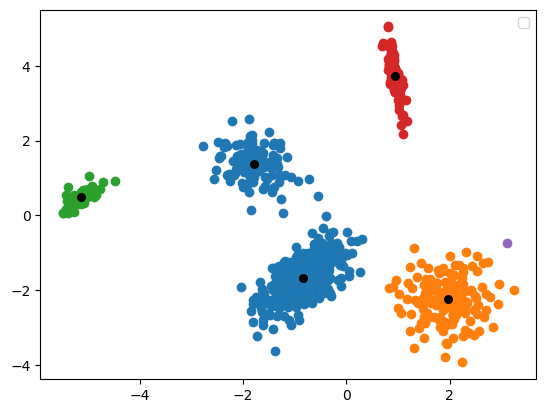

In [7]:
# Plotting the centroids for the agglomerative clusters
centroids(simple_data,y_agg_clustering)

## Loading next dataset

Average score:0.778287663329094


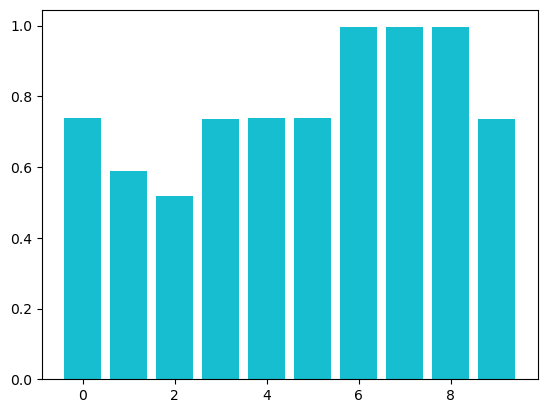

In [8]:
simple_data1, simple_labels1 = load_dataset(r"C:\Users\Abdullah\OneDrive\Documents\UoM\Data engineering\60711-Cwk3-S-Third\Week 4 (Unsupervised)\q1-1b.csv")

# Running the k means algorithm and plotting ARI
k_means(simple_data1,simple_labels1)

The average scores over the 10 runs seem to be lower with the 1b dataset than the results in 1a, (a higher ARI means the units within the cluster are more similar). 1b had an average score of 0.80 whilst k-means algorithm on the 1a dataset had an average ARI of 0.819 From the cluster plot below, we can see that the distances between each of the clusters isn't that significant, hence the similarities between the average scores.

Average score:0.003341660871704704


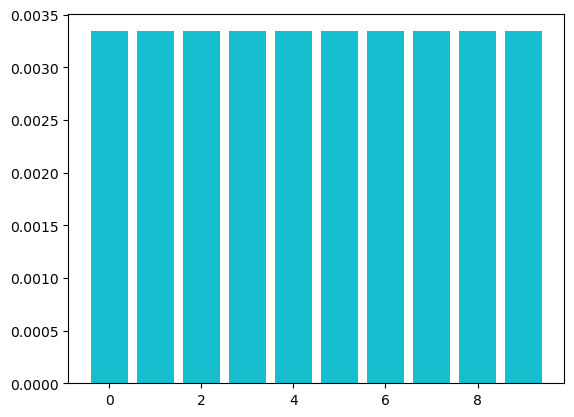

In [9]:
# Running the agglomerative algorithm
agglomerative_cluster(simple_data1,simple_labels1)


For the single-linkage algorithm with this dataset, the scores came out to be 0.0033 for all runs, much lower than the 0.707 average seen for the simple.csv dataset. With a score this low, it indicates that the data clusterings almost don't agree on any points at all.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


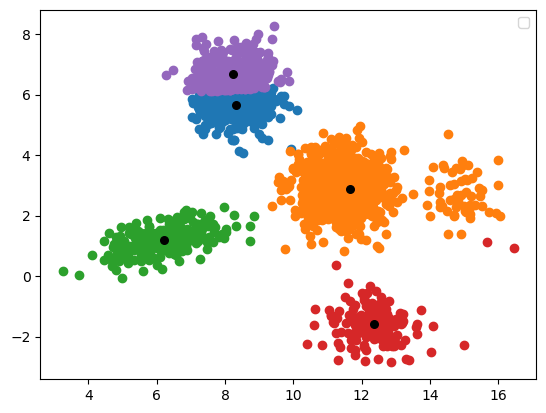

In [10]:
# Cluster plot for dataset 1-1b
centroids(simple_data1,y_kmeans)

We can see with this cluster plot that theres a much higher volume of data points (and more spread out) than the data points we had for 1a, this could've casued problems for the single-linkage algorithm as it merges 2 clusters that have the closest pair of elements that aren't already members of the same cluster. It seems here that all the points from different clusters are very close to each other, meaning the single-linkage algorithm wouldv'e quickly merged the clusters into 1.

Average score:0.5820242032968823


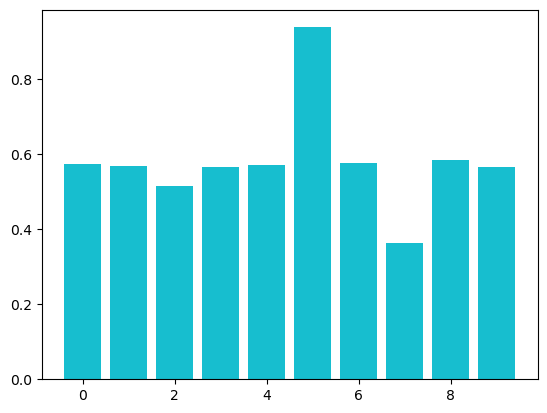

In [11]:
# Please enter any relevant code for Q1.1c below.
# You can use multiple cells if it helps

simple_data2, simple_labels2 = load_dataset(r"C:\Users\Abdullah\OneDrive\Documents\UoM\Data engineering\60711-Cwk3-S-Third\Week 4 (Unsupervised)\q1-1c.csv")

# Running the k means algorithm and plotting ARI
k_means(simple_data2,simple_labels2)

Average score:1.0


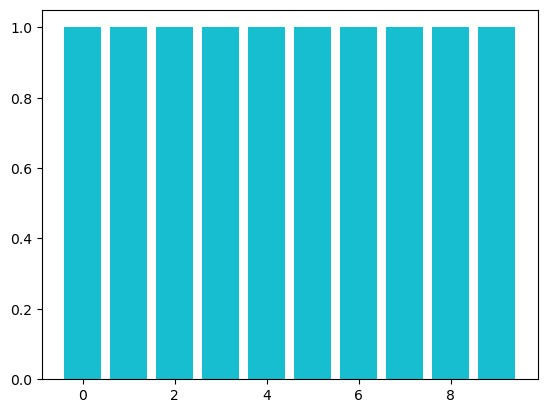

In [12]:
# Running the agglomerative clustering algorithm and plotting ARI
agglomerative_cluster(simple_data2,simple_labels2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


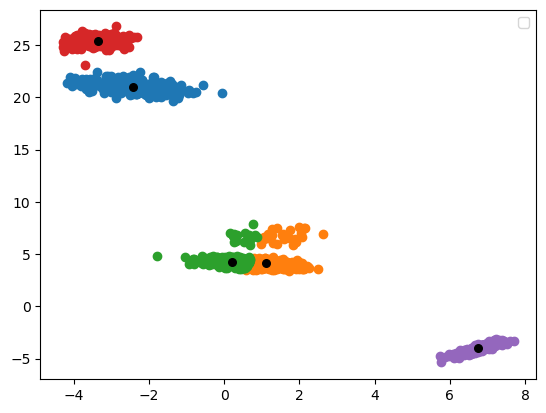

In [13]:
# Cluster plot for dataset 1-1b
centroids(simple_data2,y_kmeans)

We can see that with the k-means algorithm for this dataset, the average score is 0.585 (the lowest average score out of all the datasets). The clusters observed are not spherical shaped (which k-means performs better on). K-means does a poor job on clustering data when the cluster shapes are complicated.

However, the single-linkage algorithm gives us a perfect ARI of 1.0 (demonstrating that the data clusterings are exactly the same), this is because the data points are very close to each other and each cluster is far from another cluster.

### Two methods that can be used to estimate the true number of clusters

- The elbow method

This method examines the relationship between the number of clusters and the proportion of the variance that's explained. This measure of the variance of observations within each cluster is calculated with the 'within cluster sum of squares' (WCSS).
The number of clusters (k) is usually chosen from a range of 1-10 and is plotted as the x axes whereas the WCSS is used as the y-axes. It is expected that the WCSS reduces (a lower variance is better) as the number of clusters increases upto a certain point and after that point there is no improvement in the WCSS.
The simplicity of the computation of the elbow method makes it well suited to small sized datasets and less time complexity.

However, there are potential limitations when using the Elbow method; the optimal cluster number obtained is subjective as it relies on visual estimation (as the 'elbow' of the graph is considered the optimal number of clusters) and does not offer a measurement metric to clearly show which point is the optimum.

- Gap statistic method

A more robust approach to funding the true number of clusters is the gap statistic method. This method compares the change in within cluster variation for various values of k with the uniform (null) distribution.
The optimal number of clusters is where the gap statistic is at its maximum. However, gap statistics may have several local maxima with similar sizes creating possible uncertainties.
 
The gap statistic method is designed to be applicable to any type of clustering method, however the choice of clustering method does impact the results of the gap statistic. (Mohajer et al, 2010)

### Applying elbow method to estimate the true number of clusters

Sum of squared distances is : 5536.053873741711
Sum of squared distances is : 2600.985056341209
Sum of squared distances is : 1499.0616820394387
Sum of squared distances is : 624.8826343757814
Sum of squared distances is : 318.7135735341284
Sum of squared distances is : 230.85791797723962
Sum of squared distances is : 198.54229799755223
Sum of squared distances is : 174.43949660620336
Sum of squared distances is : 158.76970366225325
Sum of squared distances is : 143.66990343414943


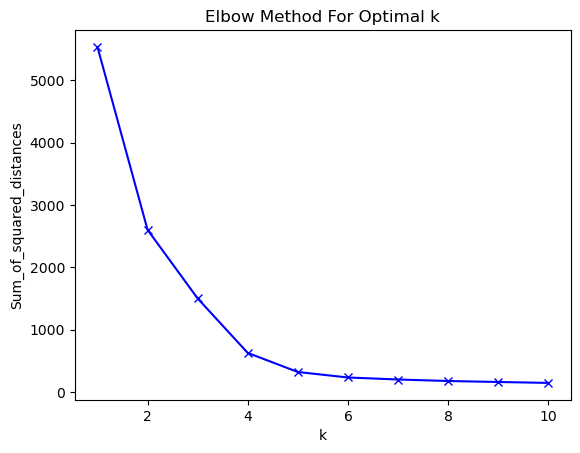

In [14]:

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(simple_data)
    Sum_of_squared_distances.append(km.inertia_)

# I needed to include this clear output command as it was giving me a UserWarning 10 times
# mentioning a memory leak for Windows
for i in range(10):
    clear_output(wait=True)
for i in Sum_of_squared_distances:
    print(f"Sum of squared distances is : {i}")
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that the optimal number of clusters given by this method is 4 as that's where the point of inflection occurs. . This is not a correct estimate for the number of clusters (as the true number we got before was 5) however this method is based on visual opinion - so someone else may have seen it and chosen 5 to be the optimal number of clusters as the sum of squared distances doesn't decrease much after this point.

# Part 2

## Online retail customers clustering

We'll use the online_retail_full.csv dataset, which is a real-world dataset of transactions for an online retail store. Here, we do not have true labels, and need to explore the data instead. This is a common scenario in practice, and will require us to explore the data and use clustering (likely requiring multiple iterations and tweaks) to try to find patterns.

In [15]:
import re
import datetime as dt
import seaborn as sns
# Load the data (the path may be different for you, adjust if needed)
retail = pd.read_csv(r"C:\Users\Abdullah\OneDrive\Documents\UoM\Data engineering\60711-Cwk3-S-Third\Week 4 (Unsupervised)\online_retail_full.csv", index_col=False)


retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


The data provides us info about the quantity and price (which we can calculate order value with) as well as the invoice date and country which seem to be useful.

Some of the common methods to segment customers are demographical, behavioural, geographical and RFM (recency, frequency and monetary value). The last one being how recently a customer bought an item, how often they're purchasing and the total monetary value of the order. Kadir, Achyar, Adrian. (2019)

In [16]:
retail.shape
# Getting some info on the data
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


We can see that the customer ID is a float, and InvoiceDate is an object. I'll convert the ID to an integer and InvoiceDate to a datetime datatype. There are also some null values as we can see a different 'non-null' count in Customer ID and Description - hence I need to drop these null values to be able to perform the cluster analysis. The reason for dropping and not replacing the values is because the ID and description are not attributes that can be replaced with say the mean or median.

In [17]:
# Dropping the null value rows
retail.dropna(inplace= True)

# Converting customer ID to integer from float and setting it to a categorical data type
retail['Customer ID'] = retail['Customer ID'].astype('int64').astype('category')

# Converting invoice date to datetime
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'])

In [18]:
"""In the data description, we're told that invoice numbers with a 'c' at the beginning are cancelled orders.
Due to this, I think these orders should be excluded from the clustering analysis"""

# Selecting all rows where there are no cancelled orders.
retail = retail[retail['Invoice'].str.contains('c',flags= re.IGNORECASE,regex=True)== False]
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [19]:
"""We can create a new attribute, (Order value) to see the total order value of each customers instance of an order"""
# Obtaining the order value (by multiplying quantity by price)
retail['OrderValue'] = retail['Quantity']*retail['Price']
retail

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_23136\2584218209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['OrderValue'] = retail['Quantity']*retail['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,OrderValue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_23136\1532134572.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_tot_order_value = retail.groupby(retail['Country'],as_index=False)[['Country','OrderValue']].sum()


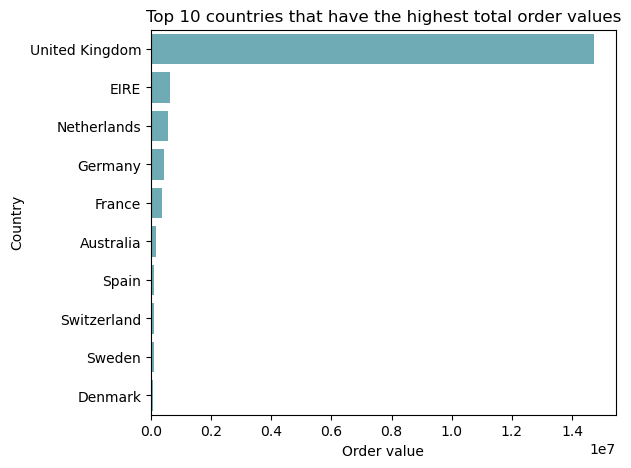

In [20]:
# Grouping countries by order value to see the total order value for each country. This could tell us which countries
# spend the highest
country_tot_order_value = retail.groupby(retail['Country'],as_index=False)[['Country','OrderValue']].sum()

# Getting the top 10 countries
top_countries= country_tot_order_value.nlargest(n=10, columns='OrderValue')

# Plotting the top 10 countries for the highest order values
fig, axis=plt.subplots(1,1,figsize=(6,5))
ax1=sns.barplot(y='Country', x='OrderValue' , data=top_countries, color='#63b3c0')
plt.xlabel('Order value')
plt.title('Top 10 countries that have the highest total order values');

In [21]:
# Formatting all floats in the dataframe to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Grouping customer ID by order value to see the total order value for each customer.
customer_total_order_value=  retail.groupby(retail['Customer ID'],as_index=False)[['Customer ID','OrderValue']].sum()
customer_total_order_value

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_23136\2288504047.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_total_order_value=  retail.groupby(retail['Customer ID'],as_index=False)[['Customer ID','OrderValue']].sum()


,Customer ID,OrderValue
0,12346,77556.46
1,12347,5633.32
2,12348,2019.40
3,12349,4428.69
4,12350,334.40
...,...,...
5937,18283,2736.65
5938,18284,461.68
5939,18285,427.00
5940,18286,1296.43


In [22]:
# I'll also include the how many orders each customer has done by counting each of the invoices (grouped by customer)
frequency = retail.groupby(retail['Customer ID'],as_index=False)['Invoice'].count()
frequency.rename(columns = {'Invoice': 'Frequency'}, inplace = True)

# Frequency of orders by country
frequency_perCountry =  retail[['Invoice','Country']].groupby('Country', as_index = False).count()
frequency_perCountry.rename(columns = {'Invoice': 'Frequency'}, inplace = True)

frequency

,Customer ID,Frequency
0,12346,34
1,12347,253
2,12348,51
3,12349,175
4,12350,17
...,...,...
5937,18283,986
5938,18284,28
5939,18285,12
5940,18286,67


In [23]:
# Viewing our current new attributes
combined = customer_total_order_value.merge(frequency, how='inner' )
combined

,Customer ID,OrderValue,Frequency
0,12346,77556.46,34
1,12347,5633.32,253
2,12348,2019.40,51
3,12349,4428.69,175
4,12350,334.40,17
...,...,...,...
5937,18283,2736.65,986
5938,18284,461.68,28
5939,18285,427.00,12
5940,18286,1296.43,67


In [24]:
# Calculating the date where a customer most recently purchased
recent_purchase= retail.groupby(retail['Customer ID'],as_index=False)['InvoiceDate'].max()
recent_purchase.rename(columns = {'InvoiceDate':'Most Recent Purchase'},inplace=True)

# Calculating the number of missing values in the most recent purchase column
# no_missing= recent_purchase['Most Recent Purchase'].isnull().sum()
# print(f"Number of missing values in the most recent purchase column: {no_missing}")

# Calculating the days elapsed since the most recent purchase
days_recent_purchase = max(retail['InvoiceDate']) - recent_purchase['Most Recent Purchase'] 

display(recent_purchase)
display(days_recent_purchase)

,Customer ID,Most Recent Purchase
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
5937,18283,2011-12-06 12:02:00
5938,18284,2010-10-04 11:33:00
5939,18285,2010-02-17 10:24:00
5940,18286,2010-08-20 11:57:00


0      325 days 02:49:00
1        1 days 20:58:00
2       74 days 23:37:00
3       18 days 02:59:00
4      309 days 20:49:00
              ...       
5937     3 days 00:48:00
5938   431 days 01:17:00
5939   660 days 02:26:00
5940   476 days 00:53:00
5941    42 days 03:21:00
Name: Most Recent Purchase, Length: 5942, dtype: timedelta64[ns]

In [25]:
"""Above, we had the days since recent purchase in a timedelta Series format. To get it in the correct form, i'll create
a list and then add it to the combined dataframe"""

days_since_last_purch= []
for i in days_recent_purchase:
    days_since_last_purch.append(i.days)
    
combined.info()
# pd.Series will leave out missing rows if there are some missing values (which in our case there were on this column)
combined['Days since last purchase'] = pd.Series(days_since_last_purch)

# Converting the days since last purchase column from a float to integer
combined['Days since last purchase']= combined['Days since last purchase'].astype(int)
combined


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 0 to 5941
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  5942 non-null   category
 1   OrderValue   5942 non-null   float64 
 2   Frequency    5942 non-null   int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 326.3 KB


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# X the input 
X= combined[['OrderValue', 'Frequency','Days since last purchase']]

"""Scaling the data- it needs to be scaled as there are really large values (OrderValue) and there are much smaller 
values (Frequency). Standardizing the data stops attributes with larger values from influencing how the cluster is
defined"""

scaler = StandardScaler()

# Fitting the data to its scaled values
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns= ['OrderValue','Frequency','Days since last purchase']
X_scaled

In [ ]:
# Running k means algorithm with 5 clusters
retail_kmeans= KMeans(n_clusters=5, init="random", n_init=1)
ykmeans= retail_kmeans.fit_predict(X_scaled)

labels= retail_kmeans.labels_
print(ykmeans)

In [ ]:
"""We need to find out the opimal number of clusters. As before, I'll use the elbow method to calculate this"""

Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

# I needed to include this clear output command as it was giving me a UserWarning 10 times
# mentioning a memory leak for Windows
for i in range(10):
    clear_output(wait=True)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this graph we can see that the optimal number of clusters is 3 as thats where the point of inflection (or 'elbow') is.

In [ ]:
# So lets choose 3 clusters
retail_kmeans= KMeans(n_clusters=3, init="random", n_init=1)
ykmeans= retail_kmeans.fit_predict(X_scaled)
labels= retail_kmeans.labels_
print(ykmeans)

# Adding in a Cluster ID column which holds the unique labels for each cluster
X_scaled['Cluster ID'] = labels
#X_scaled
sns.boxplot(x='Cluster ID',y='OrderValue',data=X_scaled)

X_scaled

The people in cluster ID 2 have higher Order values than the people in the rest of the clusters

In [ ]:
sns.boxplot(x='Cluster ID',y='Days since last purchase',data=X_scaled)

Shoppers in cluster ID 1 take longer to buy again whereas the shoppers in cluster 0 and 2 have bought more recently

In [ ]:
sns.boxplot(x='Cluster ID',y='Frequency',data=X_scaled)

We can see above that people in cluster ID 2 are more frequent shoppers when compared to cluster 0 and 1

In [ ]:
"""Due to there being 3 attributes and not 2, I have to apply principal component analysis to reduce the 
dimensionality of the data"""
from sklearn.decomposition import PCA

# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=X_scaled['Cluster ID'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

This allows us to have the cluster plot in a 2 dimensional view which otherwise wouldv'e had to been plotted in a 3 dimensional scatter plot.

# References

Towards Data Science, 2018, *K-means Clustering: Algorithm, Applications*, Evaluation Methods, and Drawbacks, accessed 26 October 2022, 
<https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a#:~:text=the%20average%20score.-,Drawbacks,job%20in%20clustering%20the%20data>

Mohajer, M. (2010) *'A comparison of Gap statistic definitions with and with-out logarithm function'*, pp. 13-14. 

Kadir, M. & Achyar, A. (2019). Customer Segmentation on Online Retail using RFM Analysis: Big Data Case of Bukku.id. 10.4108/eai.1-4-2019.2287279